In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install opencv-python
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.1 MB 2.4 MB/s eta 0:00:16
    --------------------------------------- 0.5/38.1 MB 4.7 MB/s eta 0:00:08
    --------------------------------------- 0.9/38.1 MB 5.6 MB/s eta 0:00:07
   - -------------------------------------- 1.1/38.1 MB 5.2 MB/s eta 0:00:08
   - -------------------------------------- 1.2/38.1 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.2/38.1 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.3/38.1 MB 3.5 MB/s eta 0:00:11
   - -------------------------------------- 1.8/38.1 MB 4.6 MB/s eta 0:00:08
   -- -----------------

In [3]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data= 60,000 images
Test data = 10,000 images
Image Dimension 28 * 28
glee scale image=> one channel

In [8]:
print(X_train[10].shape)

(28, 28)


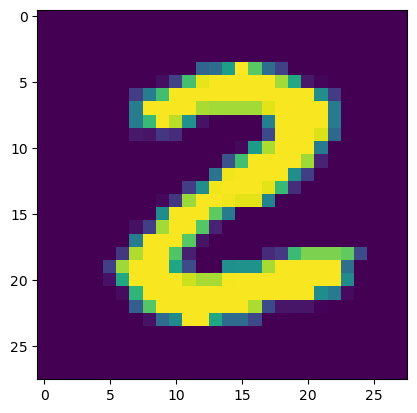

2


In [10]:
plt.imshow(X_train[25])
plt.show()
print(Y_train[25])

## Image Labels

In [11]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [13]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply one hot encoding 
All the images have the same dimensions in this dataset if not we have to resize all the dimensions of an image to a common one.

In [14]:
#Normalisation 
# scaling the values

X_train = X_train/255
X_test = X_test/255


In [15]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Building the Neural Network 

In [16]:
#setting up the layer 
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [18]:
#compiling the Neural Network
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
#training the data set
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2858 - accuracy: 0.9181
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1331 - accuracy: 0.9597
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0999 - accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0801 - accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0562 - accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0486 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0439 - accuracy: 0.9861
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0386 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033


# Accuracy on the Test data

In [21]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0951 - accuracy: 0.9747


In [22]:
print(loss,accuracy)

0.09506409615278244 0.9746999740600586


Record the test accuracy is 97.46 %

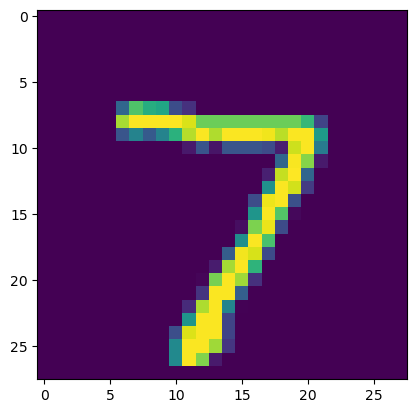

In [23]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [24]:
print(Y_test[0])

7


In [25]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [26]:
print(Y_pred.shape)

(10000, 10)


In [27]:
print(Y_pred[0])

[4.1644243e-03 2.6289294e-03 2.8459165e-01 3.7815708e-01 2.2013485e-07
 7.9044729e-04 6.4623753e-12 9.9999964e-01 5.9101509e-04 5.5266224e-02]


In [28]:
# Converting the prediction probabilities to class label
label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [29]:
# Converting the prediction probabilities to class labels for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 8, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

If we properly see here then we have converted all the class label values and the range of zero to 9 all the label values are in the range zero to 9

# Confusion matrix

In [30]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [31]:
print(conf_mat)

tf.Tensor(
[[ 966    1    2    1    1    6    1    1    1    0]
 [   0 1121    5    1    0    2    2    1    3    0]
 [   3    1 1013    1    2    1    2    6    3    0]
 [   1    1    6  979    0    8    0    5    3    7]
 [   1    0    2    1  963    1    4    0    0   10]
 [   2    0    0    5    1  877    2    1    1    3]
 [   5    2    2    2    4   14  926    0    3    0]
 [   1    3    7    2    0    1    0 1013    0    1]
 [   7    1    6   12    5   13    2    5  922    1]
 [   3    3    0    5    8    7    0   11    5  967]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

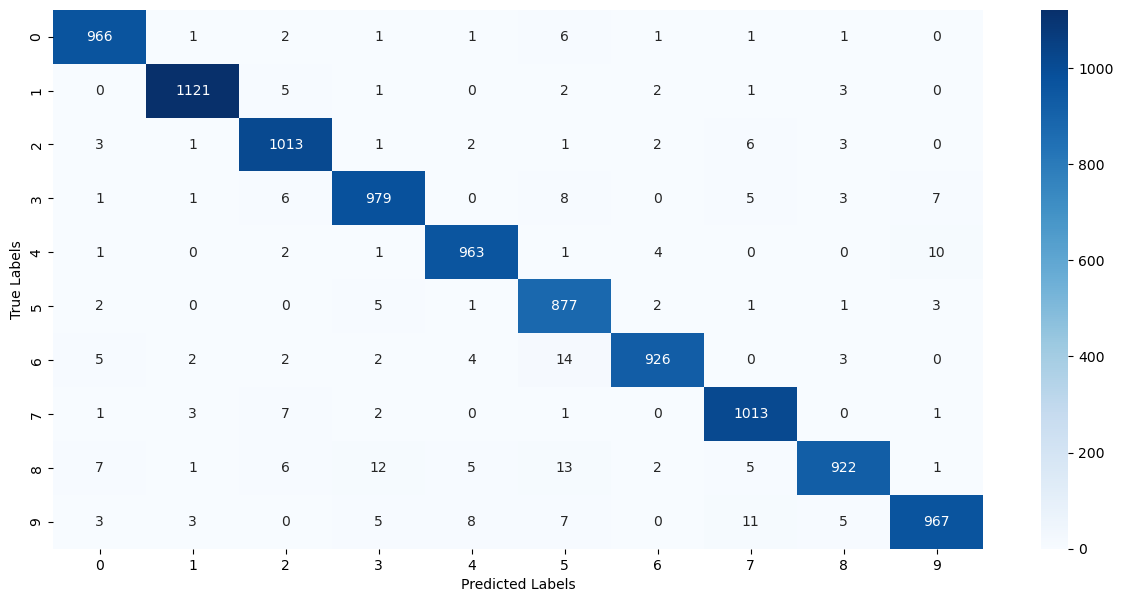

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [33]:
input_image=cv2.imread('MNIST_digit.png')

In [34]:
type(input_image)

numpy.ndarray

In [35]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [36]:
cv2_imshow(input_image)

NameError: name 'cv2_imshow' is not defined

In [37]:
input_image.shape

(318, 318, 3)

In [39]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [40]:
grayscale.shape

(318, 318)

In [41]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [42]:
input_image_resize.shape

(28, 28)

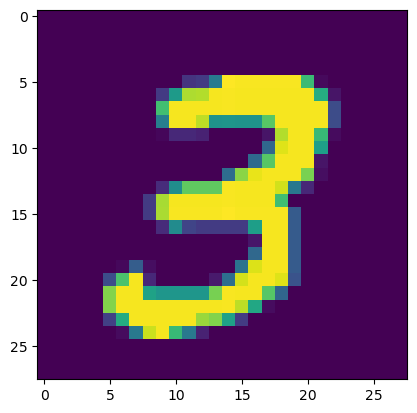

In [45]:
plt.imshow(input_image_resize)
plt.show()

In [44]:
input_image_resize = input_image_resize/255

In [46]:
type(input_image_resize)

numpy.ndarray

In [47]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [48]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 20ms/step
[[2.9371490e-13 6.1229475e-06 1.4029578e-02 1.0000000e+00 6.5636224e-14
  2.7798718e-02 2.6921152e-20 5.3232419e-04 4.8629474e-03 4.0361091e-02]]


In [49]:
input_pred_label = np.argmax(input_prediction)

In [50]:
print(input_pred_label)

3


# Predictive system

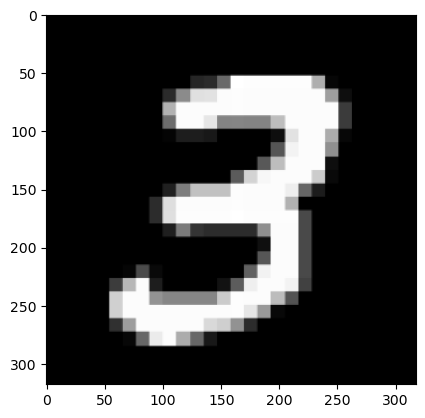

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  3


In [52]:

input_image = cv2.imread('MNIST_digit.png')

#  this does nto work in jupyter cv2_imshow(input_image)
plt.imshow(input_image)
plt.show()

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)